In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import math
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.neighbors import KernelDensity
plt.close("all")
data = np.load("heart_disease_data.npz") 

(b) We want to write a MAP function and calculate the error on the test data.

In [86]:
### --- HELPER FUNCTIONS --- ###
# Function that outputs the indices of x where val occurs
def ind_x_eq_val(x, val):
    return np.where(x==val)[0]


# Function that counts the proportion of all entries in x that are equal to val
def count_x_eq_val(x, val):
    return len(ind_x_eq_val(x, val))/float(len(x))
    

# Function that computes a Gaussian pdf with mean mu and std deviation sig at the values in x
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)


### --- QUESTION (B) --- ###
# Estimate the pmf of H
P_H0 = count_x_eq_val(data['heart_disease'], 0)
P_H1 = count_x_eq_val(data['heart_disease'], 1)

# Estimate the conditional pmf of S given H
P_S_H0 = np.zeros(2)
P_S_H1 = np.zeros(2)
for ind_S in range(2):
    P_S_H0[ind_S] = count_x_eq_val(data['sex'][ind_x_eq_val(data['heart_disease'], 0)], ind_S)
    P_S_H1[ind_S] = count_x_eq_val(data['sex'][ind_x_eq_val(data['heart_disease'], 1)], ind_S)

# Estimate the conditional pmf of C given H
P_C_H0 = np.zeros(4)
P_C_H1 = np.zeros(4)
for ind_C in range(4):
    P_C_H0[ind_C] = count_x_eq_val(data['chest_pain'][ind_x_eq_val(data['heart_disease'], 0)], ind_C)
    P_C_H1[ind_C] = count_x_eq_val(data['chest_pain'][ind_x_eq_val(data['heart_disease'], 1)], ind_C)


In [87]:
# Calculate the MAP estimate
MAP_estimate_S_C = np.zeros(shape=(2,4))
for c in range(4):
    for s in range(2):
        val1 = P_H0 * P_S_H0[s] * P_C_H0[c]
        val2 = P_H1 * P_S_H1[s] * P_C_H1[c]
        compared_val = np.array([val1, val2])
        MAP_estimate_S_C[s, c] = np.argmax(compared_val)
        
print(MAP_estimate_S_C)
# Calculate the error rate - i.e. the proportion of all predictions that were incorrect

predicted = []
for i in range(50):
    s = int(data['sex_test'][i])
    c = int(data['chest_pain_test'][i])
    val1 = P_H0 * P_S_H0[s] * P_C_H0[c]
    val2 = P_H1 * P_S_H1[s] * P_C_H1[c]
    compared_val = np.array([val1, val2])
    predicted.append(np.argmax(compared_val))

error_rate_S_C = sum(np.abs(predicted - data['heart_disease_test']))/50

print("Probability of error " + str(error_rate_S_C))

[[0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Probability of error 0.18


(c) We want to derive the MAP estimate of $\tilde{h}$ given  $\tilde{s}$, $\tilde{c}$, and $\tilde{x}$ as a function of the pmf of $\tilde{h}(p_{\tilde{h}})$ and the conditional pmfs $p_{\tilde{s}|\tilde{h}}$, $p_{\tilde{c}|\tilde{h}}$, and $p_{\tilde{x}|\tilde{h}}$. The MAP estimate is defined as the mode of the posterior distribution. Assume that if we know whether a patient is suffering from heart disease, the sex of the patient, the type of chest pain experienced by the patient, and the cholesterol level are all conditionally independent.

Similar to part (a) we use you Bayes' Theorem and conditional independence to find: $$p_{\tilde{h}|\tilde{s},\tilde{c},\tilde{x}}(h|s,c,x)  = \frac{p_{\tilde{s}|\tilde{h}}(s|h) p_{\tilde{c}|\tilde{h}}(c|h) f_{\tilde{x}|\tilde{h}}(x|h) p_{\tilde{h}}(h)}{p_{\tilde{s},\tilde{c}}(s,c)}. $$

Our denominator is not dependent on $h$ and so our MAP estimate is: $\text{MAP} = \underset{h}{\operatorname{argmax}} [ p_{\tilde{s}|\tilde{h}}(s|h) p_{\tilde{c}|\tilde{h}}(c|h) f_{\tilde{x}|\tilde{h}}(x|h) p_{\tilde{h}}(h)]$.

(d) We  decide  to  model  the  cholesterol  level  of  a  patient  conditioned  on  whether  heor  she  suffers  from  heart  disease  as  a  Gaussian  random  variable.

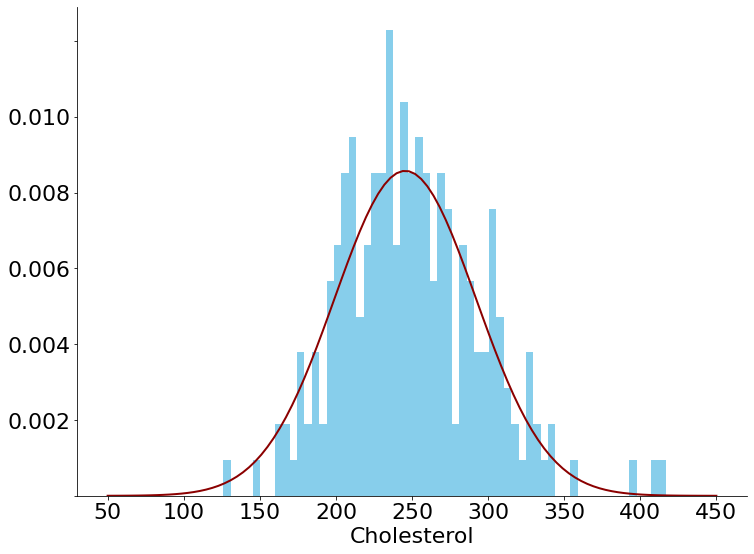

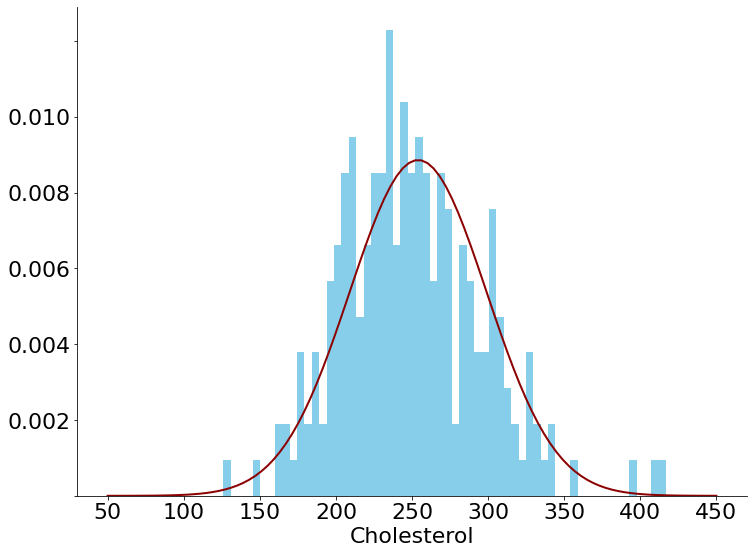

In [88]:
### --- QUESTION (D) --- ###
## Estimate conditional pdf of X given H
mean_X_H = np.zeros(2)
std_X_H = np.zeros(2)
mean_X_H[0]= np.mean(data['cholesterol'][ind_x_eq_val(data['heart_disease'], 0)])
std_X_H[0] = np.std(data['cholesterol'][ind_x_eq_val(data['heart_disease'], 0)])
mean_X_H[1]= np.mean(data['cholesterol'][ind_x_eq_val(data['heart_disease'], 1)])
std_X_H[1] = np.std(data['cholesterol'][ind_x_eq_val(data['heart_disease'], 1)])

n_plot = 100
for i in range(2):
    plt.figure(figsize=(12, 9))  
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False) 
    plt.xticks(fontsize=22) 
    plt.yticks(fontsize=22) 
    plt.xlabel("Cholesterol", fontsize=22)  
    
    plt.hist(data['cholesterol'],
             60,density=True,edgecolor = "none", color="skyblue")
    
    plt.plot(np.linspace(50, 450, n_plot),gaussian(np.linspace(50, 450, n_plot), 
                     mean_X_H[i], std_X_H[i]), color="darkred", lw=2)

(e) We want to write a MAP function and calculate the error on the test data with the cholesterol data.

In [84]:
### --- QUESTION (E) --- ###
# Calculate the MAP estimate

MAP_estimate_S_C_X = []

for i in range(50):
    s = int(data['sex_test'][i])
    c = int(data['chest_pain_test'][i])
    x1 = gaussian(data['cholesterol_test'][i], mean_X_H[0], std_X_H[0])
    x2 = gaussian(data['cholesterol_test'][i], mean_X_H[1], std_X_H[1])
    v1 = P_H0 * P_S_H0[s] * P_C_H0[c] * x1
    v2 = P_H1 * P_S_H1[s] * P_C_H1[c] * x2
    MAP_estimate_S_C_X.append(np.argmax([v1, v2]))
    
# Calculate the error rate

error_rate_S_C_X = sum(np.abs(MAP_estimate_S_C_X - data['heart_disease_test']))/50
print("Probability of error using cholesterol " + str(error_rate_S_C_X))

Probability of error using cholesterol 0.14


The result intuitively makes sense to be lower because we incorporated the cholesterol data.

(f) We have made some conditional independence assumptions that do not necessarily hold. Another option would have been to estimate the joint distribution of all the random variables from the data.

Without assuming conditional independence, the prediction may be more accurate because there will more parameters the capture the relations between all the random variables. However if we do not assume conditional independence, there will be up to $2^n - 1$ parameters to estimate $\tilde{h}$, where $n$ is the number of obersvations.